In [90]:
# Importing Pandas for Dataframe Manipulation as well as Matplotlib and Seaborn for data visualization.
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Reading in our Cars Data and storing it in a new dataframe.
df = pd.read_csv("cars.csv")

# Renaming our columns for increased readability.
df.columns = ["MPG", "Cylinders", "Cubic Inches", "HP", "Weight (Lbs)", "Time-To-60", "Year", "Brand"]

# Dropping the cubic inches and weight columns to avoid the presence of empty string values (for simplicity).
df.drop(["Cubic Inches", "Weight (Lbs)"], axis=1, inplace=True)

# Printing out the first five rows of our dataframe!
df.head()

,MPG,Cylinders,HP,Time-To-60,Year,Brand
0,14.0,8,165,12,1972,US.
1,31.9,4,71,14,1980,Europe.
2,17.0,8,140,11,1971,US.
3,15.0,8,150,10,1971,US.
4,30.5,4,63,17,1978,US.


In [69]:
# Checking to see the number of null or missing values from each column attribute in our dataframe.
df.isnull().sum()

MPG           0
Cylinders     0
HP            0
Time-To-60    0
Year          0
Brand         0
dtype: int64

In [70]:
from sklearn.preprocessing import LabelEncoder

# Creating a new Label Encoder object.
encoder = LabelEncoder()

# Label Encoding our "Brand" column to make it numeric instead of nominal (Europe: 0, Japan: 1, US: 2).
df["Brand"] = encoder.fit_transform(df["Brand"]) 

# Visualizing our newly-modified dataframe.
df.head()

,MPG,Cylinders,HP,Time-To-60,Year,Brand
0,14.0,8,165,12,1972,2
1,31.9,4,71,14,1980,0
2,17.0,8,140,11,1971,2
3,15.0,8,150,10,1971,2
4,30.5,4,63,17,1978,2


In [94]:
from sklearn.model_selection import train_test_split

# Splitting up our dataframe into X and Y portions.
x_data = df.drop("Brand", axis=1)
y_data = df["Brand"]

# Retrieving our X and Y train-test sets by splitting up our data in an 80-20 ratio.
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

In [95]:
from sklearn.tree import DecisionTreeClassifier

# Creating a new Decision Tree Classifier Object.
model = DecisionTreeClassifier()

# Fitting our model to our X and Y train sets!
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

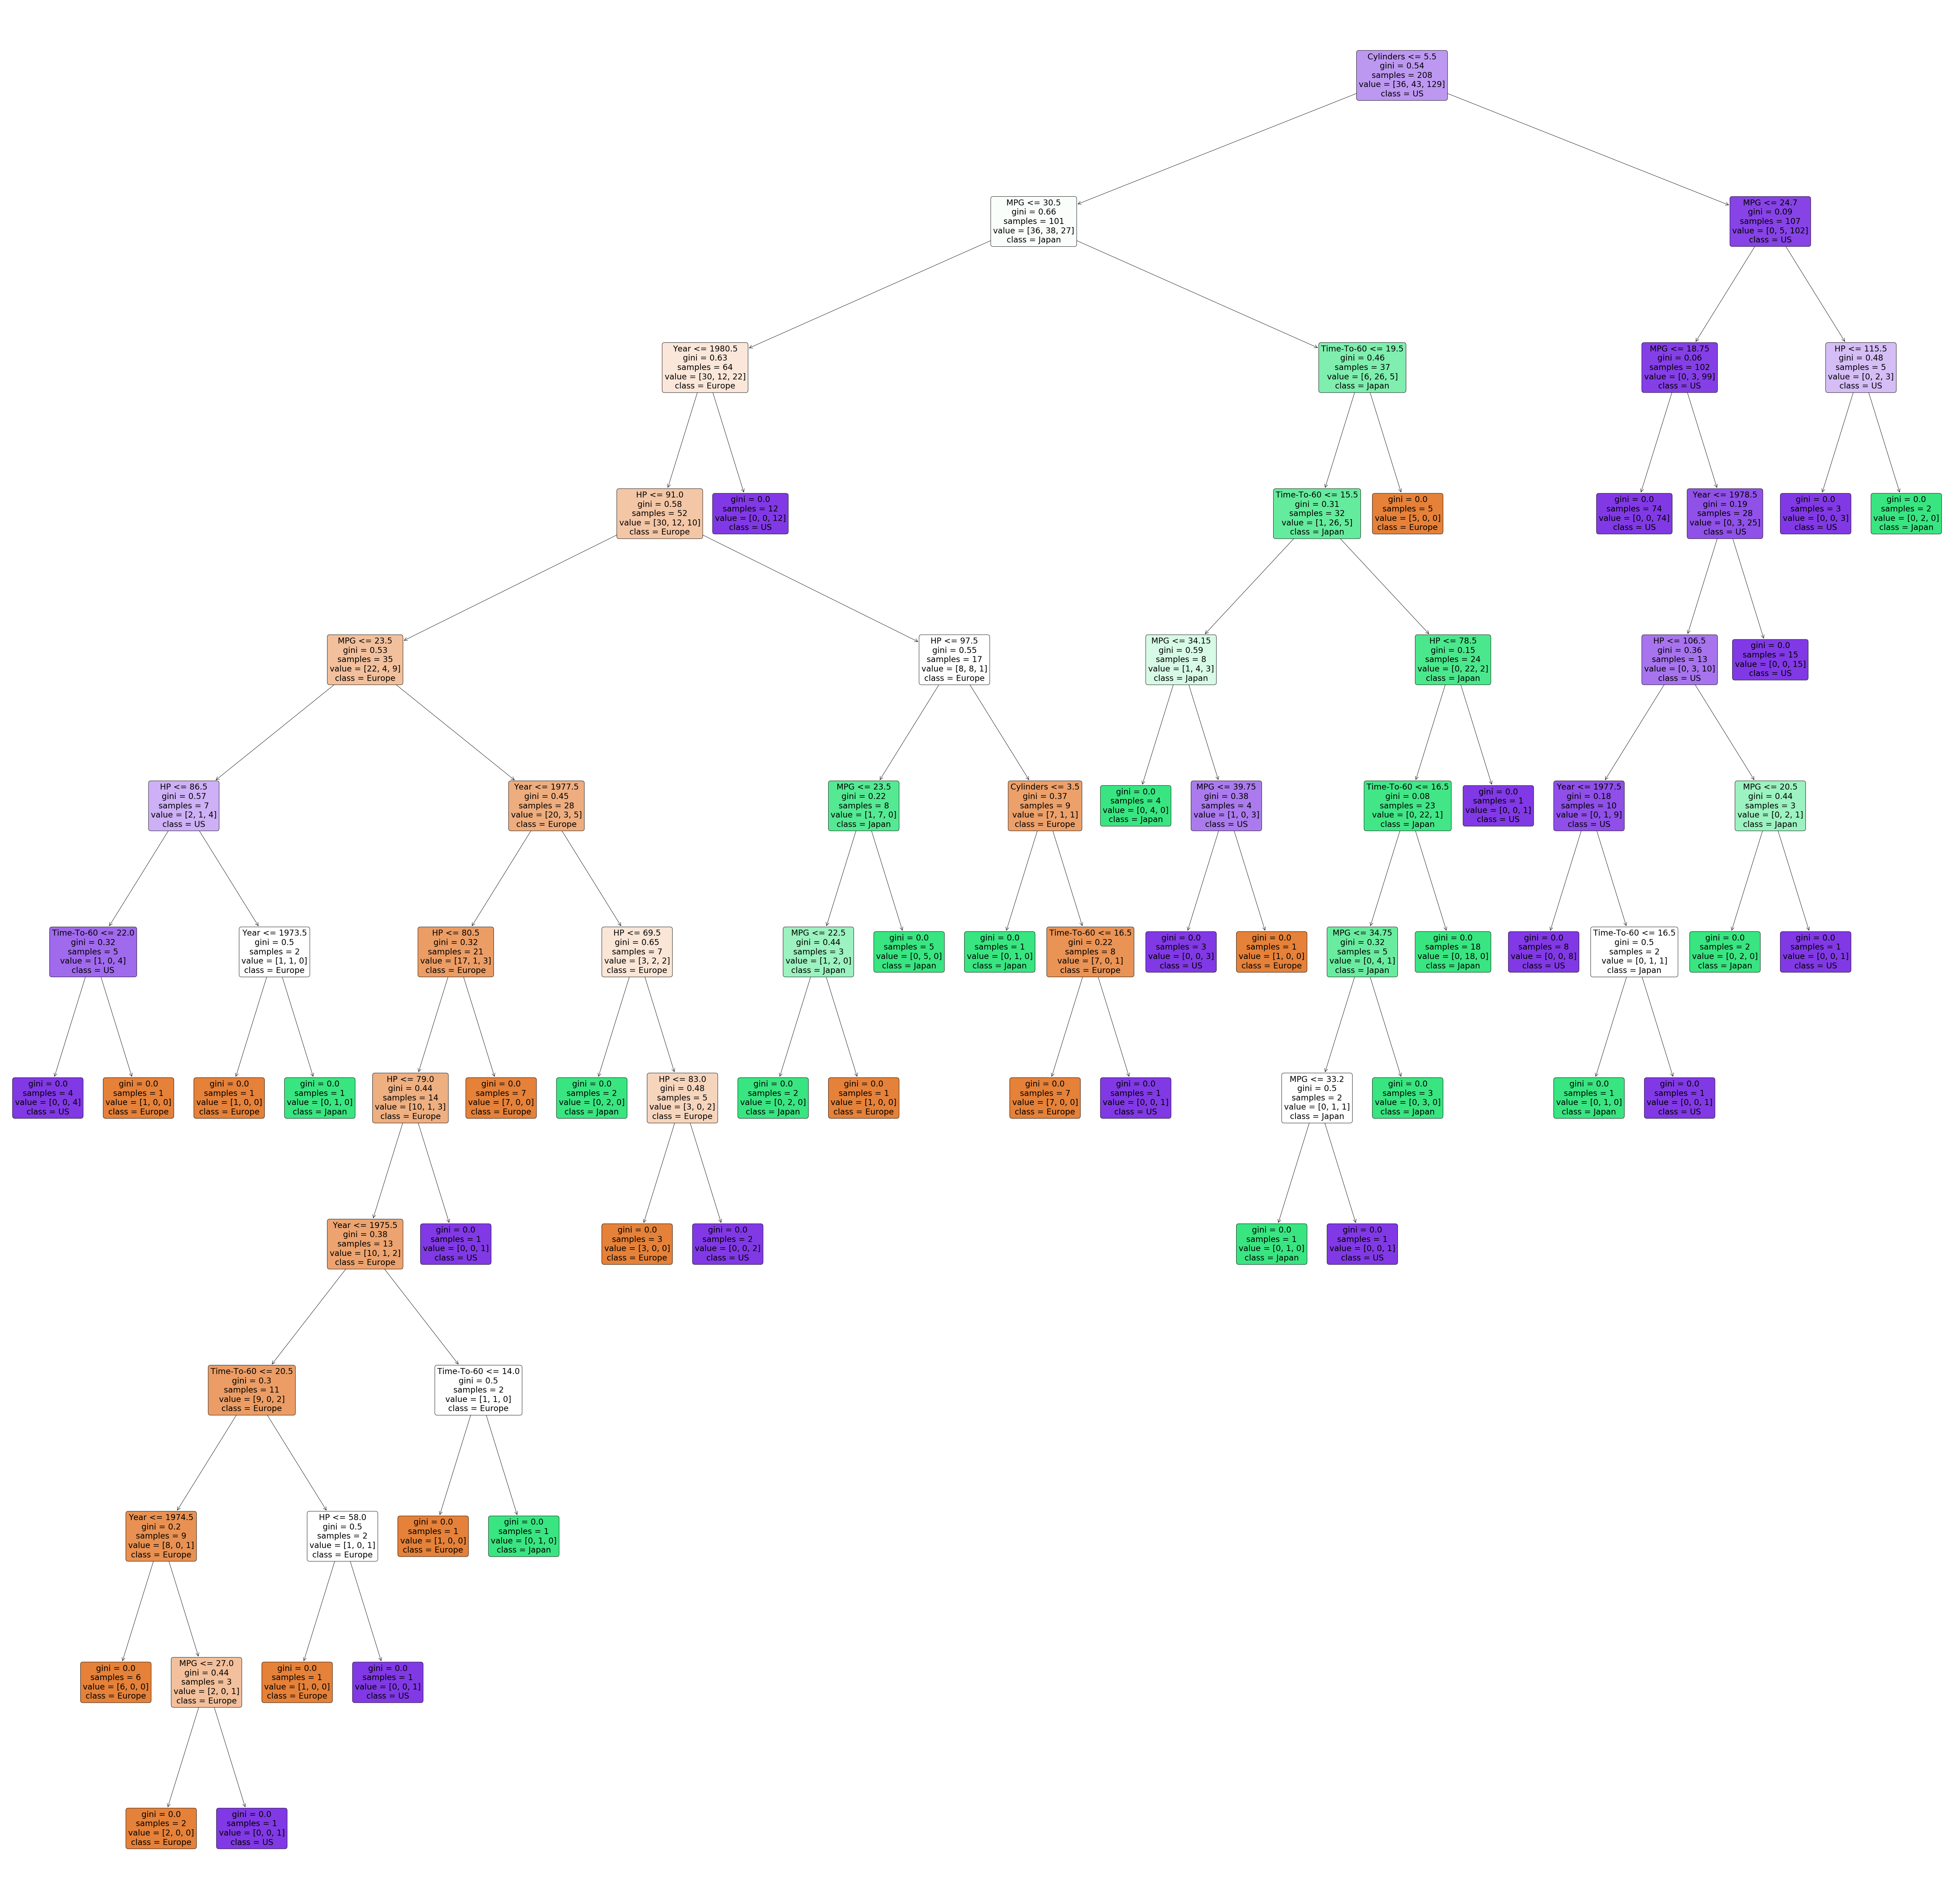

In [96]:
# Importing the 'plot_tree' function.
from sklearn.tree import plot_tree

# Setting the dimensions of our image to be 100 x 100.
plt.figure(figsize=(100,100))

# Visualizing our decision tree!
plot_tree(model, 
          filled=True, # specifies whether or not the decision nodes should be filled appropriately or not.
          feature_names = x_data.columns.values, # names of our independent variables.
          class_names = ["Europe", "Japan", "US"], # class values of our dependent variable (country).
          rounded = True, # rounding probablities.
          proportion = False, # removing percentages.
          precision = 2); # setting number of significant figures to two.


In [97]:
# Storing a list of model predictions by calling the 'predict' function with our X Test Set passed in as a parameter.
predictions = model.predict(x_test)

In [98]:
# Gaging the accuracy measure of our model.
model.score(x_test, y_test)

0.7169811320754716

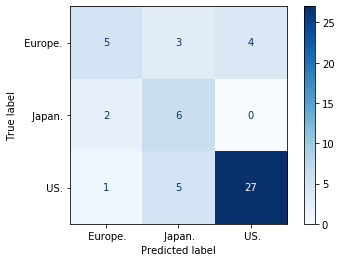

In [99]:
# Plotting a confusion matrix to see where our model made the most misclassifications (false positives and false negatives).
plot_confusion_matrix(model, x_test, y_test, cmap='Blues')
plt.show()